# **1. Import Libraries**

In [ ]:
!pip install -U matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load Data** <br>


*   Data yang digunakan yaitu [Ecommerce Customer Churn Analysis and Prediction](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction) dari kaggle.com.
*   File Excel terdiri dari 2 sheet, kita akan mengeksplor sheet kedua (*E Comm*).



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/E Commerce Dataset.xlsx', sheet_name='E Comm')

Salah satu tahapan dalam Workflow Data Science adalah Data Understanding. Pada tahap ini, biasaya akan dilakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik data, termasuk mencatat seluruh kecacatan yang ditemukan pada dataset. Semua pengamatan akan dicatat sebagai daftar pekerjaan/tindakan yang nantinya akan diproses pada tahap Data Preparation (Data Pre-processing). Selain itu, pada tahap EDA, kita juga dapat menggali business insight yang kita temukan dari data yang kita analisis. <br>

Tahap EDA bersifat iteratif dan menghabiskan waktu yang cukup banyak. Untuk memudahkan investigasi pada tahap ini, saya mengusulkan 4 tahapan penting yang wajib dilakukan, yaitu:

1.   Structure Investigation
2.   Descriptive Statistics
3.   Univariate Analysis
4.   Multivariate Analysis








# **3. Structure Investigation** <br>
Hal yang perlu diperhatikan:



*   Bentuk umum dari dataset
*   Tipe data di setiap kolom. Apakah ada tipe data yang kurang sesuai?
*   Duplicated data
*   Missing value calculation



## 3.1 DataFrame General Information

Deskripsi setiap kolom: <br>
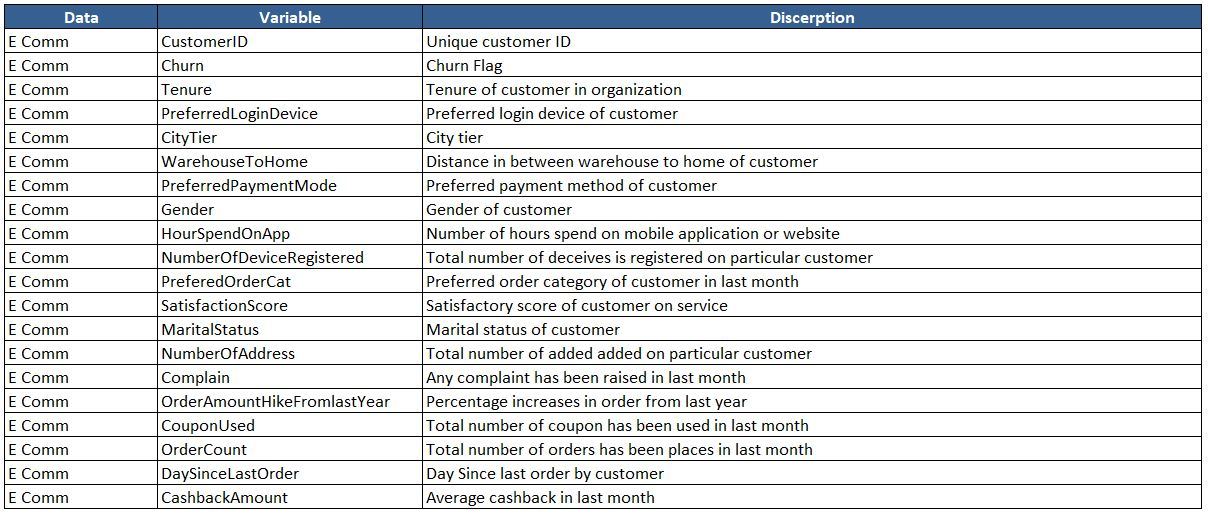

In [ ]:
df.shape # (jumlah baris, jumlah kolom)

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   



*   Dataset terdiri dari 5630 baris dan 20 kolom.
*   Terdapat 7 kolom yang missing value (Non-null count < Jumlah baris) yaitu: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder.
*   Sepertinya tidak ada kolom dengan tipe data yang aneh.



## 3.2 Data Types (Numerical & Non-Numerical Features) <br>
[Pandas select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) <br>
Untuk memudahkan dalam pengecekan entri, kita dapat mencuplik data secara random mengggunakan df.sample(). Hal ini bertujuan untuk mengecek isi dari setiap kolom. Ini akan membangun intuisi kita terhadap data yang kita analisis. Di sini kita memastikan kembali apakah tipe data dari setiap kolom sudah sesuai atau belum. Selain itu, mungkin saja kita juga menemukan entri yang aneh pada kolom tertentu.

In [ ]:
# coba running berulang kali
df.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1301       51302      0     5.0                Phone         1   
152        50153      0    11.0         Mobile Phone         3   
4964       54965      0    22.0             Computer         1   
3362       53363      0    16.0         Mobile Phone         3   
950        50951      0     5.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1301             35.0           Debit Card  Female             NaN   
152              13.0          Credit Card  Female             2.0   
4964              7.0          Credit Card    Male             3.0   
3362             21.0          Credit Card  Female             4.0   
950              16.0          Credit Card    Male             0.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1301                         4              Mobile                  4   
152                          2  Laptop & Accessory                  5   
4964                         2             Grocery                  1   
3362                         5  Laptop & Accessory                  3   
950                          3             Fashion                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1301        Single                2         0                         13.0   
152        Married                2         1                         24.0   
4964        Single                4         0                          NaN   
3362        Single                9         0                         18.0   
950         Single                3         0                         25.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1301         3.0         4.0                1.0          128.37  
152          0.0         7.0                7.0          156.05  
4964         1.0         3.0                2.0          293.85  
3362         1.0         2.0                4.0          187.44  
950          0.0         1.0                NaN          212.44

Sepertinya tidak ada anomali dari setiap entri pada masing-masing kolom.

### 3.2.1 Numerical Features <br>

In [ ]:
nums = df.select_dtypes(include=['number'])
nums.sample(5)

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
4196       54197      1    14.0         3             10.0             3.0   
4638       54639      0     1.0         3             20.0             3.0   
4262       54263      1     1.0         1             13.0             4.0   
3663       53664      0     9.0         1              7.0             3.0   
4871       54872      1     1.0         1             17.0             4.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
4196                         5                  3                3         1   
4638                         4                  3                3         0   
4262                         5                  1                3         1   
3663                         5                  2                2         0   
4871                         5                  5                8         1   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
4196                         15.0         2.0         2.0                3.0   
4638                         12.0         2.0         2.0                7.0   
4262                         19.0         1.0         2.0                1.0   
3663                         13.0         2.0         2.0                1.0   
4871                         21.0         2.0         2.0                1.0   

      CashbackAmount  
4196          151.83  
4638          145.96  
4262          154.26  
3663          178.63  
4871          149.04

- Terdapat 15 numerical features.
- Meskipun kolom **Churn** dan kolom **Complain** pada DataFrame ini dikategorikan sebagai numerik karena berisi nilai 0 dan 1, tetapi pada dasarnya mereka merupakan boolean, yaitu True dan False.

### 3.2.2 Non-Numerical Features

In [ ]:
cats = df.select_dtypes(exclude=['number', 'datetime'])
cats.sample(5)

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
1708                Phone             E wallet  Female              Mobile   
1305         Mobile Phone          Credit Card  Female             Fashion   
5343         Mobile Phone           Debit Card    Male  Laptop & Accessory   
4057                Phone                  COD    Male        Mobile Phone   
1564         Mobile Phone             E wallet  Female  Laptop & Accessory   

     MaritalStatus  
1708        Single  
1305       Married  
5343       Married  
4057       Married  
1564       Married

- Terdapat 5 categorical features.
- Sepertinya tidak ada entri yang aneh di setiap kolom categorical.

## 3.3 Checking Duplicated Data <br>
Cek data duplikat di keseluruhan DataFrame (termasuk Customer ID sebagai identifier).

In [ ]:
df.duplicated().any()

False

Tidak ditemukan adanya data duplikat dari pengecekan seluruh kolom pada DataFrame.

## 3.4 Missing Value Calculation
Sangat lumrah ketika kita mendapatkan dataset yang memiliki baris kosong di kolom tertentu. Oleh karena itu, kita perlu mengecek jumlah baris yang kosong pada dataset ini. Harapannya kita tidak menemukan baris kosong yang jumlahnya sangat besar. 

In [ ]:
# Missing value percentage
missing_count = df.isnull().sum()           # the count of missing value
value_count = df.isnull().count()           # the count of all values

missing_percentage = round(missing_count/value_count * 100, 2)
missing_df = pd.DataFrame({'Missing Value Count':missing_count, 'Missing Value Percentage':missing_percentage})
missing_df

Missing Value Count  Missing Value Percentage
CustomerID                                     0                      0.00
Churn                                          0                      0.00
Tenure                                       264                      4.69
PreferredLoginDevice                           0                      0.00
CityTier                                       0                      0.00
WarehouseToHome                              251                      4.46
PreferredPaymentMode                           0                      0.00
Gender                                         0                      0.00
HourSpendOnApp                               255                      4.53
NumberOfDeviceRegistered                       0                      0.00
PreferedOrderCat                               0                      0.00
SatisfactionScore                              0                      0.00
MaritalStatus                                  0                      0.00
NumberOfAddress                                0                      0.00
Complain                                       0                      0.00
OrderAmountHikeFromlastYear                  265                      4.71
CouponUsed                                   256                      4.55
OrderCount                                   258                      4.58
DaySinceLastOrder                            307                      5.45
CashbackAmount                                 0                      0.00

Kita berhasil menghitung persentase baris kosong dari setiap kolom. Terdapat 7 kolom yang mengandung missing value sama seperti yang sudah kita amati pada sub-bagian 3.1. Untungnya, ketujuh kolom tersebut memiliki persentase missing value < 5.5% sehingga masih dapat dikatakan cukup aman.

  Untuk melihat persebaran missing value dari setiap kolom, kita dapat menggunakan fungsi matrix dari library ***missingno*** yang berfungsi untuk menampilkan plot dari posisi missing value di setiap kolom. Baris kosong ditandai oleh warna putih, sedangkan kolom yang mengandung value berwarna abu-abu.

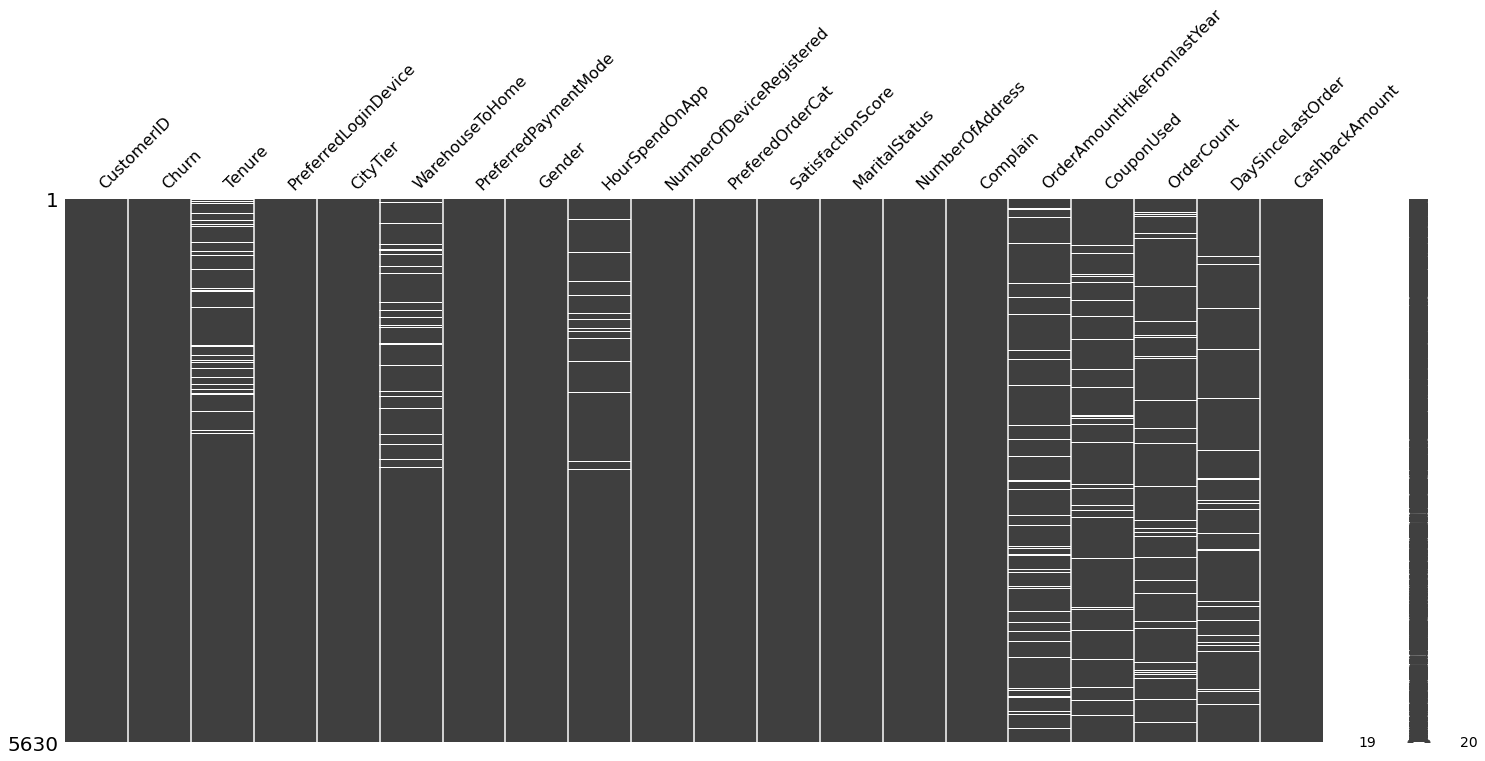

In [ ]:
# Plot of Missing Values
import missingno as msno
msno.matrix(df);

Kita juga dapat melihat korelasi dari missing value di satu kolom dengan kolom lainnya menggunakan [heatmap di **missingno**](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=Using%20missingno%20to%20Identify%20Missing,advantages%20for%20identifying%20missing%20data/). <br>
Deskripsi heatmap:
- Nilai yang mendekati positif 1 menunjukkan bahwa keberadaan missing value di satu kolom berkorelasi dengan keberadaan missing value di kolom lainnya. Dengan kata lain, misal kolom A memiliki missing value pada baris 1, maka pada baris 1 di kolom B juga memiliki missing value.

- Nilai yang mendekati negatif 1 menunjukkan bahwa keberadaan missing value di satu kolom antikorelasi dengan keberadaan missing value di kolom lain. Dengan kata lain, ketika missing value ada di baris 1 kolom A, maka di baris 1 kolom B justru mengandung value.

- Nilai yang mendekati 0, menunjukkan ada sedikit atau tidak ada hubungan antara keberadaan missing value dalam satu kolom dengan kolom lainnya.

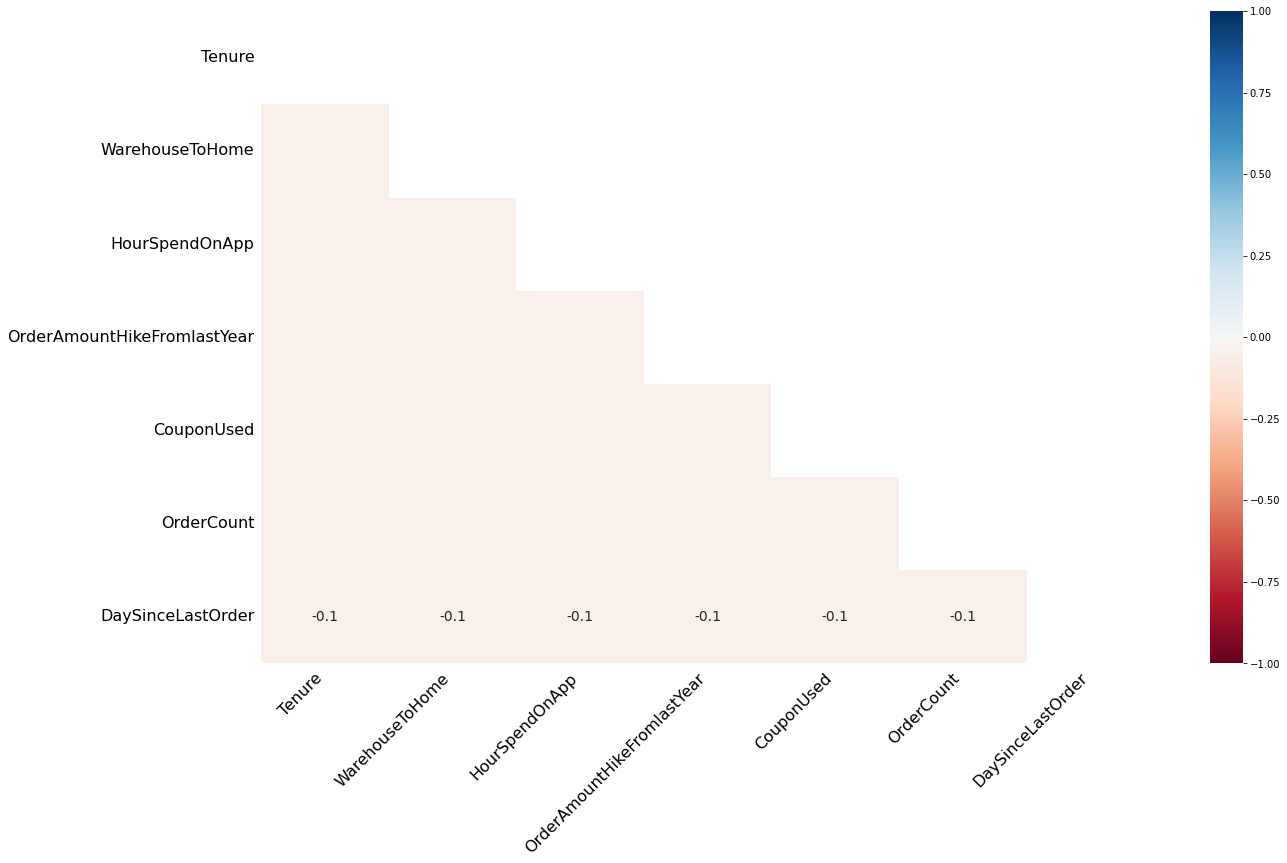

In [ ]:
msno.heatmap(df);

Berdasarkan heatmap di atas, semua pasangan antara 2 kolom memiliki nilai korelasi -0.1. Meskipun nilai korelasi negatif menandakan bahwa baris yang kosong pada kolom tertentu justru baris yang mengandung nilai pada kolom lainnya, tetapi karena nilainya mendekati 0 maka dapat dikatakan korelasinya sangat rendah atau bahkan bisa disebut tidak ada korelasi.

# **4. Descriptive Statistics**

## 4.1 Descriptive statiscs of numerical features <br>
Hal-hal yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah terdapat keanehan dengan nilai maksimal dan nilai minimal di setiap kolom/feature?
- Bagaimana kira-kira distribusi data berdasarkan analisis singkat dari nilai mean dan median?


In [ ]:
nums.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

- Kolom **Churn** dan kolom **Complain** merupakan boolean/binary, teramati dari nilai min, max, dan percentile.
- Beberapa kolom yang sepertinya terdistribusi normal (nilai mean dan mediannya tidak berbeda jauh) adalah **Tenure**, **WarehouseToHome**, **HourSpendOnApp**, **OrderAmountHikeFromlastYear**, **CouponUsed**, **OrderCount**, dan **DaySinceLastOrder**. Ini dapat divalidasi saat melakukan Univariate Analysis.
- Kolom **CityTier** sepertinya ordinal (ordinal: 3 sampai ~10 unique values di satu kolom).
- Kolom yang sepertinya tidak terdistribusi normal (positively skewed): **CashbackAmount**.
- Berdasarkan pengamatan seluruh nilai dari setiap kolom, sepertinya tidak ada masalah serius atau anomali yang ditemukan.

## 4.2 Descriptive statiscs of Non-Numerical Features <br>
Hal-hal yang perlu diperhatikan:
- Apakah jumlah unique values di setiap kolom masuk akal?
- Apakah ada ketimpangan jumlah nilai dari setiap unique values? Misal ada 1 nilai yang dominan

In [ ]:
cats.describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

- Ternyata tidak ada missing value pada semua kolom categorical.
- Jumlah unique values dari semua kolom categorical cukup masuk akal (< 8).
- Sepertinya terdapat unique value yang cukup dominan pada kolom **PreferredPaymentMode (Value: Debit Card)**, **PreferedOrderCat(Value: Laptop & Accessory)**, dan **MaritalStatus(Value: Married)**. 

Sekarang, kita coba tamplikan semua unique values dari setiap kolom. Hal ini perlu dilakukan untuk mengetahui apakah ada value yang tidak konsisten pada data kita.

In [ ]:
# Unique Values of Non-Numerical Features
for col in cats.columns:
  unique = cats[col].unique()
  nunique = cats[col].nunique()
  print(col,'- total:',nunique)
  print(unique)
  print('='*50,'\n')

PreferredLoginDevice - total: 3
['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode - total: 7
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender - total: 2
['Female' 'Male']

PreferedOrderCat - total: 6
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus - total: 3
['Single' 'Divorced' 'Married']



Kita berhasil mengidentifikasi unique value yang tidak konsisten pada beberapa kolom, yaitu:
- **PreferredPaymentMode**: CC dan Credit Card; Cash On Delivery dan COD
- **PreferedOrderCat**: Mobile dan Mobile Phone

Kita perlu menyamakan nilai yang tidak konsisten di atas saat berada di tahap Data Preparation.

Lebih dalam lagi ke dataset kita, sekarang kita tampilkan jumlah nilai dari tiap unique value di setiap kolom.

In [ ]:
# Value Counting of Non-Numerical Features
for col in cats.columns:
  count = cats[col].value_counts()
  print(col, ':')
  print(count)
  print('='*50,'\n')

PreferredLoginDevice :
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

PreferredPaymentMode :
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender :
Male      3384
Female    2246
Name: Gender, dtype: int64

PreferedOrderCat :
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus :
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



# **5. Univariate Analysis**

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 8

## 5.1 Numerical Features

### 5.1.1 Scatter Plot
Penggunaan dari scatter plot adalah untuk mengetahui persebaran data secara global, terutama feature yang datanya berupa ordinal/diskret (unique value ~3 sampai 10).

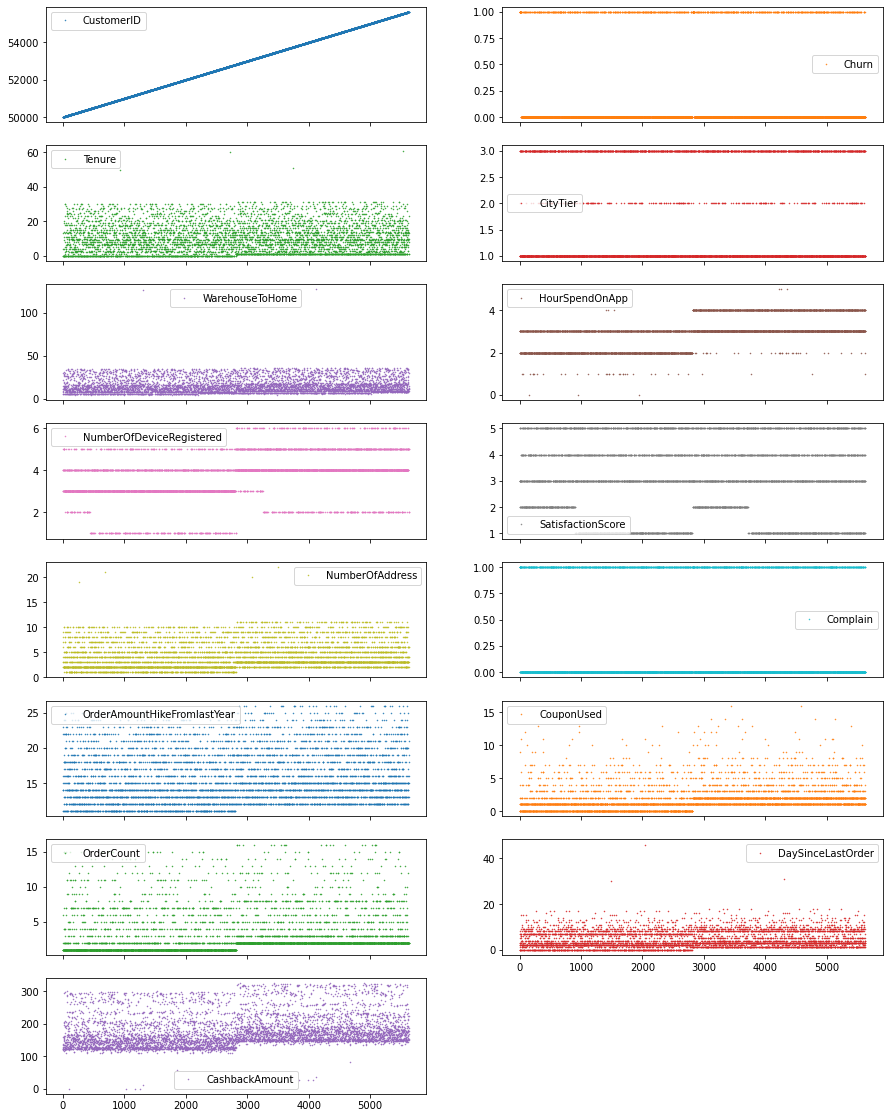

In [ ]:
nums.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 20), markersize=1);

Kita menemukan kolom yang bersifat ordinal/diskret, antara lain: **CityTier**, **HourSpendOnApp**, **NumberOfDeviceRegistered**, **SatisfactionScore**.

### 5.1.2 Boxplot
Hal yang perlu diperhatikan dari boxplot adalah keberadaan pencilan (outlier) dari setiap feature. Outlier ini berpengaruh terhadap distribusi data sehingga perlu untuk ditangani.

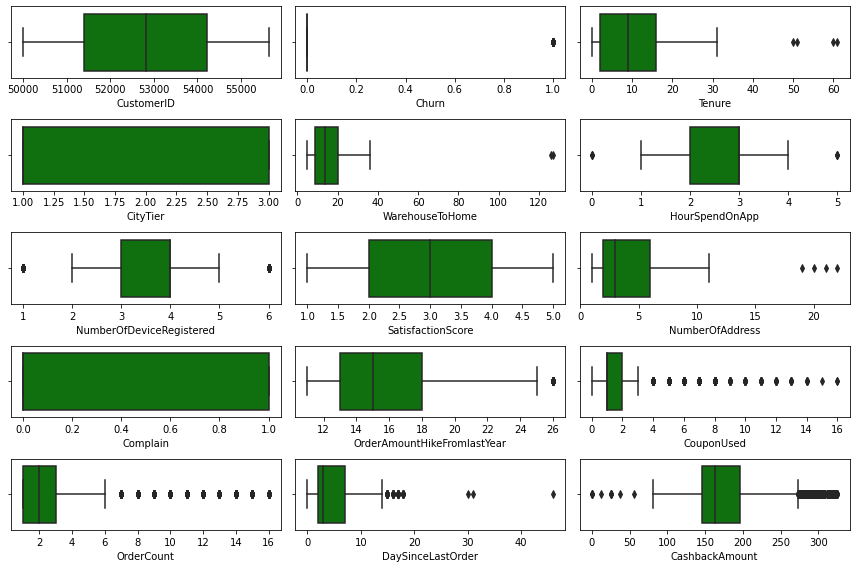

In [ ]:
features = nums.columns

for i in range(len(features)):
  plt.subplot(5, 3, i+1)
  sns.boxplot(x=nums[features[i]], color='green')
  plt.subplots_adjust(hspace=0.5)
  plt.tight_layout()

- Berdasarkan boxplot di atas, kita dapat mengamati keberadaan outlier dari sejumlah feature seperti pada **Tenure**, **WarehouseToHome**, **NumberOfAddress**, **OrderAmountHikeFromlastYear**, **CouponUsed**, **OrderCount**, **DaySinceLastOrder**, **CashbackAmount**.
- Untuk feature lainnya terlihat normal, terutama feature yang ordinal (unique value-nya 3 sampai ~10).

### 5.1.2 Histogram and KDE plot

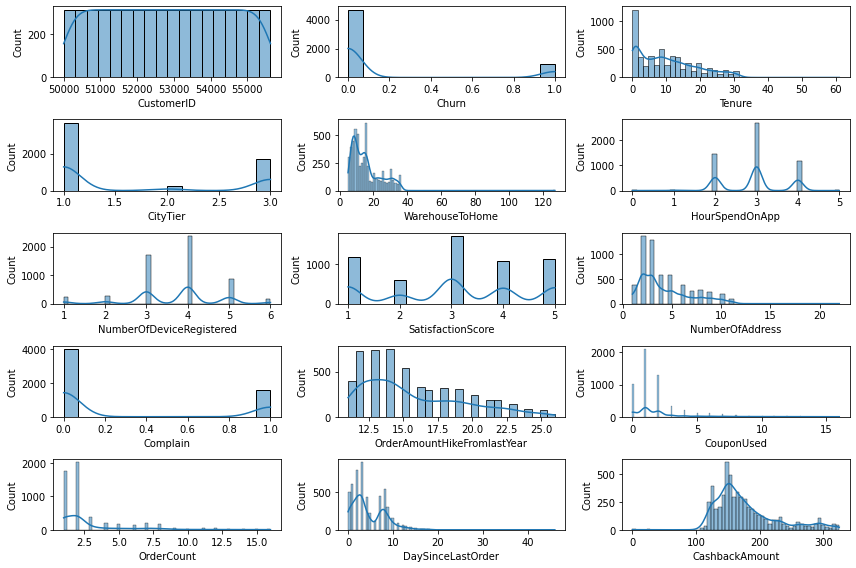

In [ ]:
features = nums.columns

for i in range(len(features)):
  plt.subplot(5, 3, i+1)
  sns.histplot(data=nums, x=nums[features[i]], kde=True)
  plt.tight_layout()

- Kolom **Churn** dan **Complain** bersifat biner sehingga tidak perlu terlalu diperhatikan distribusi datanya.
- Kolom **Churn** memiliki ketimpangan jumlah data antara yang Churn dan Tidak Churn. Perlu dilakukan oversampling/undersampling saat Data Preparation.
- Kolom yang bersifat ordinal yaitu: **CityTier**, **HourSpendOnApp**, **NumberOfDeviceRegistered**, **SatisfactionScore**.
- Feature yang distribusinya right skewed: **Tenure**, **WarehouseToHome**, **NumberOfAddress**, **OrderAmountHikeFromlastYear**, **CouponUsed**,	**OrderCount**,	**DaySinceLastOrder**, dan	**CashbackAmount**. Semua feature ini perlu di-handle saat Data Preparation, mungkin perlu dilakukan log transformation.

In [ ]:
# Kita cek dugaan kita terhadap features yang ordinal atau diskret
ordinal_features = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

for col in ordinal_features:
  print(col, ':', nums[col].nunique())

CityTier : 3
HourSpendOnApp : 6
NumberOfDeviceRegistered : 6
SatisfactionScore : 5


Sesuai dengan dugaan kita bahwa keempat features ini memiliki jumlah unique value yang tidak lebih dari 7, sehingga kita tidak perlu terlalu memperhatikan distribusi datanya.

## 5.2 Non-Numerical Features

### 5.2.1 Barplot/Countplot

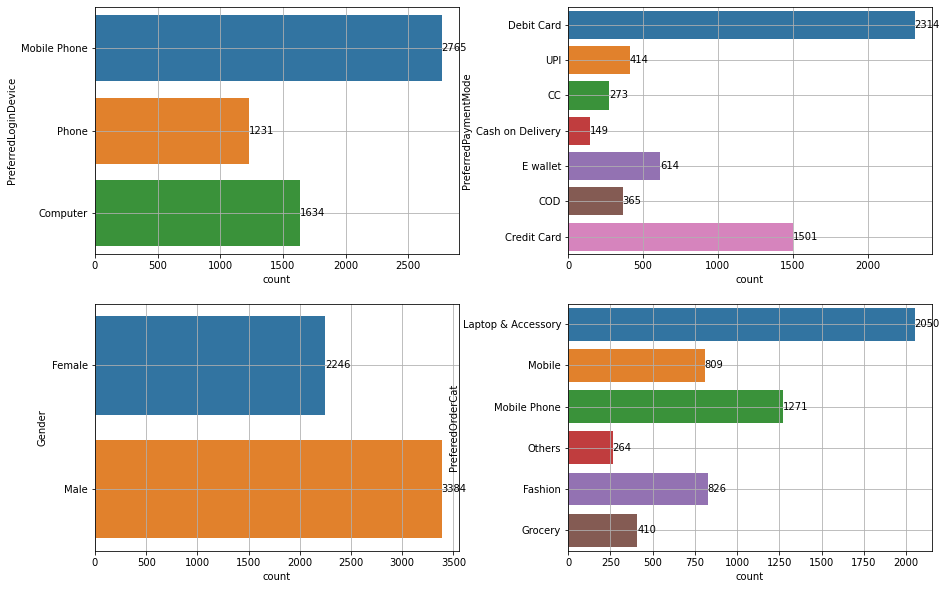

In [ ]:
features = cats.columns

ax = plt.figure(figsize=(15, 10))
for i in range(len(features)):
  if i < len(features)-1:
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=cats, y=cats[features[i]])
    plt.subplots_adjust(wspace=0.3)
    plt.grid()
    
    for label in ax.containers:
      ax.bar_label(label)

- Tidak ada ketimpangan yang signifikan pada jumlah entri dari keempat feature di atas.
- Seperti pengamatan sebelumnya terdapat value yang tidak konsisten pada beberapa feature.

# **6. Multivariate Analysis**

## 6.1 Numericals Features

### 6.1.1 Correlation Heatmap <br>

Fungsi dari heatmap correlation adalah untuk menjaring feature-feature yang potensial terhadap target (kolom Churn). Kita mengharapkan nilai absolut korelasi yang tinggi antara feature dan target. Akan tetapi, hal yang perlu diingat bahwa metode yang digunakan adalah Pearson yang pada dasarnya menghitung korelasi linear antar 2 variabel, sehingga kita tidak mengakomodir korelasi yang non-linier.

Selain itu, kita juga ingin mengidentifikasi 2 feature yang berkorelasi kuat (abs(>0.7)). Apabila terdapat 2 feature yang korelasinya kuat maka kemungkinan keduanya redundan dan akan menghasilkan [**Multicollinearity**](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences)

In [ ]:
nums.corr()

CustomerID     Churn    Tenure  CityTier  \
CustomerID                     1.000000 -0.019083  0.029952  0.003239   
Churn                         -0.019083  1.000000 -0.349408  0.084703   
Tenure                         0.029952 -0.349408  1.000000 -0.060688   
CityTier                       0.003239  0.084703 -0.060688  1.000000   
WarehouseToHome                0.058909  0.076630 -0.018218  0.010624   
HourSpendOnApp                 0.598417  0.018675 -0.021226 -0.009150   
NumberOfDeviceRegistered       0.411098  0.107939 -0.023983  0.027934   
SatisfactionScore             -0.033146  0.105481 -0.013903 -0.011554   
NumberOfAddress                0.160814  0.043931  0.237666 -0.029440   
Complain                      -0.009944  0.250188 -0.021268  0.003375   
OrderAmountHikeFromlastYear    0.117243 -0.010058  0.005825 -0.031408   
CouponUsed                     0.234302 -0.008264  0.129035  0.021456   
OrderCount                     0.139008 -0.028697  0.186403  0.033388   
DaySinceLastOrder              0.113243 -0.160757  0.184552  0.017525   
CashbackAmount                 0.217129 -0.154118  0.476380  0.055746   

                             WarehouseToHome  HourSpendOnApp  \
CustomerID                          0.058909        0.598417   
Churn                               0.076630        0.018675   
Tenure                             -0.018218       -0.021226   
CityTier                            0.010624       -0.009150   
WarehouseToHome                     1.000000        0.060990   
HourSpendOnApp                      0.060990        1.000000   
NumberOfDeviceRegistered            0.019071        0.316800   
SatisfactionScore                   0.007722        0.031858   
NumberOfAddress                    -0.011020        0.145126   
Complain                            0.028696        0.006976   
OrderAmountHikeFromlastYear         0.038795        0.106843   
CouponUsed                         -0.003935        0.191528   
OrderCount                          0.002681        0.109575   
DaySinceLastOrder                   0.017829        0.075716   
CashbackAmount                     -0.009200        0.121490   

                             NumberOfDeviceRegistered  SatisfactionScore  \
CustomerID                                   0.411098          -0.033146   
Churn                                        0.107939           0.105481   
Tenure                                      -0.023983          -0.013903   
CityTier                                     0.027934          -0.011554   
WarehouseToHome                              0.019071           0.007722   
HourSpendOnApp                               0.316800           0.031858   
NumberOfDeviceRegistered                     1.000000          -0.017228   
SatisfactionScore                           -0.017228           1.000000   
NumberOfAddress                              0.084997           0.053583   
Complain                                     0.003407          -0.031115   
OrderAmountHikeFromlastYear                  0.069475          -0.027730   
CouponUsed                                   0.151685           0.017936   
OrderCount                                   0.103464           0.019764   
DaySinceLastOrder                            0.018208           0.032082   
CashbackAmount                               0.137183           0.003473   

                             NumberOfAddress  Complain  \
CustomerID                          0.160814 -0.009944   
Churn                               0.043931  0.250188   
Tenure                              0.237666 -0.021268   
CityTier                           -0.029440  0.003375   
WarehouseToHome                    -0.011020  0.028696   
HourSpendOnApp                      0.145126  0.006976   
NumberOfDeviceRegistered            0.084997  0.003407   
SatisfactionScore                   0.053583 -0.031115   
NumberOfAddress                     1.000000 -0.026399   
Complain                           -0.

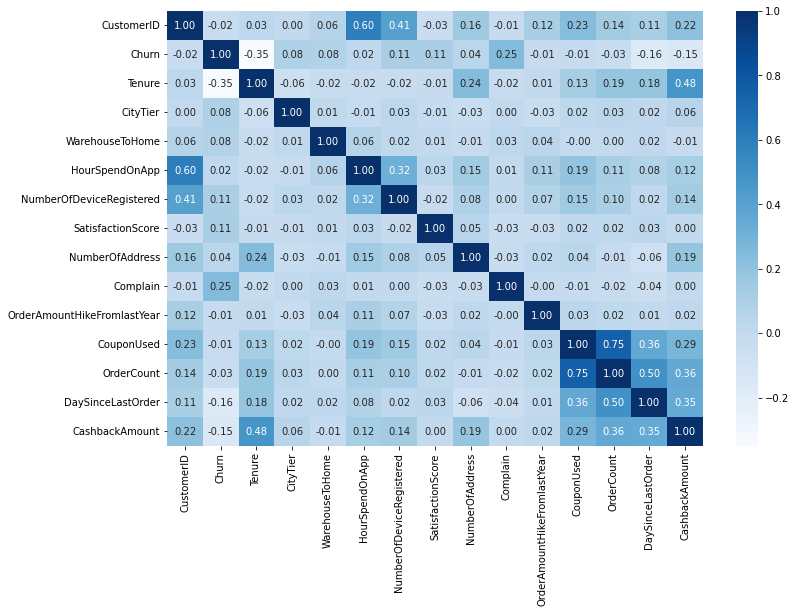

In [ ]:
sns.heatmap(nums.corr(), annot=True, fmt='.2f', cmap='Blues');

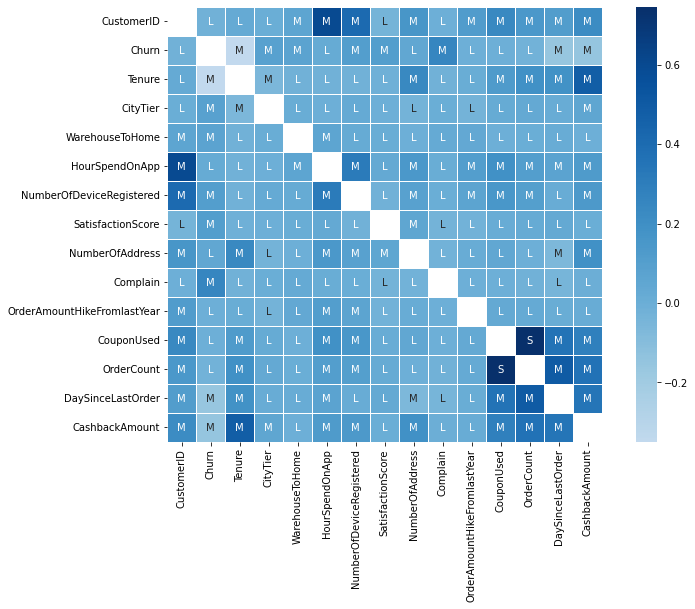

In [ ]:
corr = nums.corr(method='pearson')

labels = np.where(abs(corr)>0.7, 'S', np.where(abs(corr)>=0.05, 'M', 'L'))

sns.heatmap(corr, mask=np.eye(len(corr)), square=True, center=0, annot=labels,
            fmt='', lw='.5', cmap='Blues');

Kita buat kategori agar mempermudah pembacaan nilai di atas dengan pembagian sebagai berikut:
- corr > 0.7 : high
- 0.05 <= corr <= 0.7 : medium
- corr < 0.05 : low

Beberapa hal yang teramati dari heatmap di atas adalah: <br>
- Terdapat 8 Feature yang memiliki korelasi > 0.05 terhadap kolom Churn, yaitu Tenure, CityTier, WarehouseToHome, NumberOfDeviceRegistered,	SatisfactionScore, Complain, DaySinceLastOrder, dan CashbackAmount.
- Feature CoupenUsed memiliki korelasi yang tinggi dengan OrderCount sehingga dapat menimbulkan redundan. Kita akan memilih OrderCount karena nilai korelasinya lebih tinggi terhadap kolom Churn.
- Meskipun NumberOfAdress memiliki korelasi 0.04 tetapi mungkin bisa kita coba pertahankan. (?) ini jangan dulu.

- Total ada 10 feature yang potensial.

### 6.1.2 Pairplot

Kita bisa gunakan pairplot untuk melihat scatterplot dari setiap pasangan feature yang kita miliki. Di sini, kita ingin mengamati pola menarik yang dapat menambah pengetahuan kita terhadap feature yang ingin kita pilih. Selain itu, kita juga dapat memperkuat argumentasi kita terhadap feature yang memang memiliki korelasi yang sangat lemah terhadap target kita.

In [ ]:
nums_plot = nums.drop(columns=['CustomerID'], axis=1)

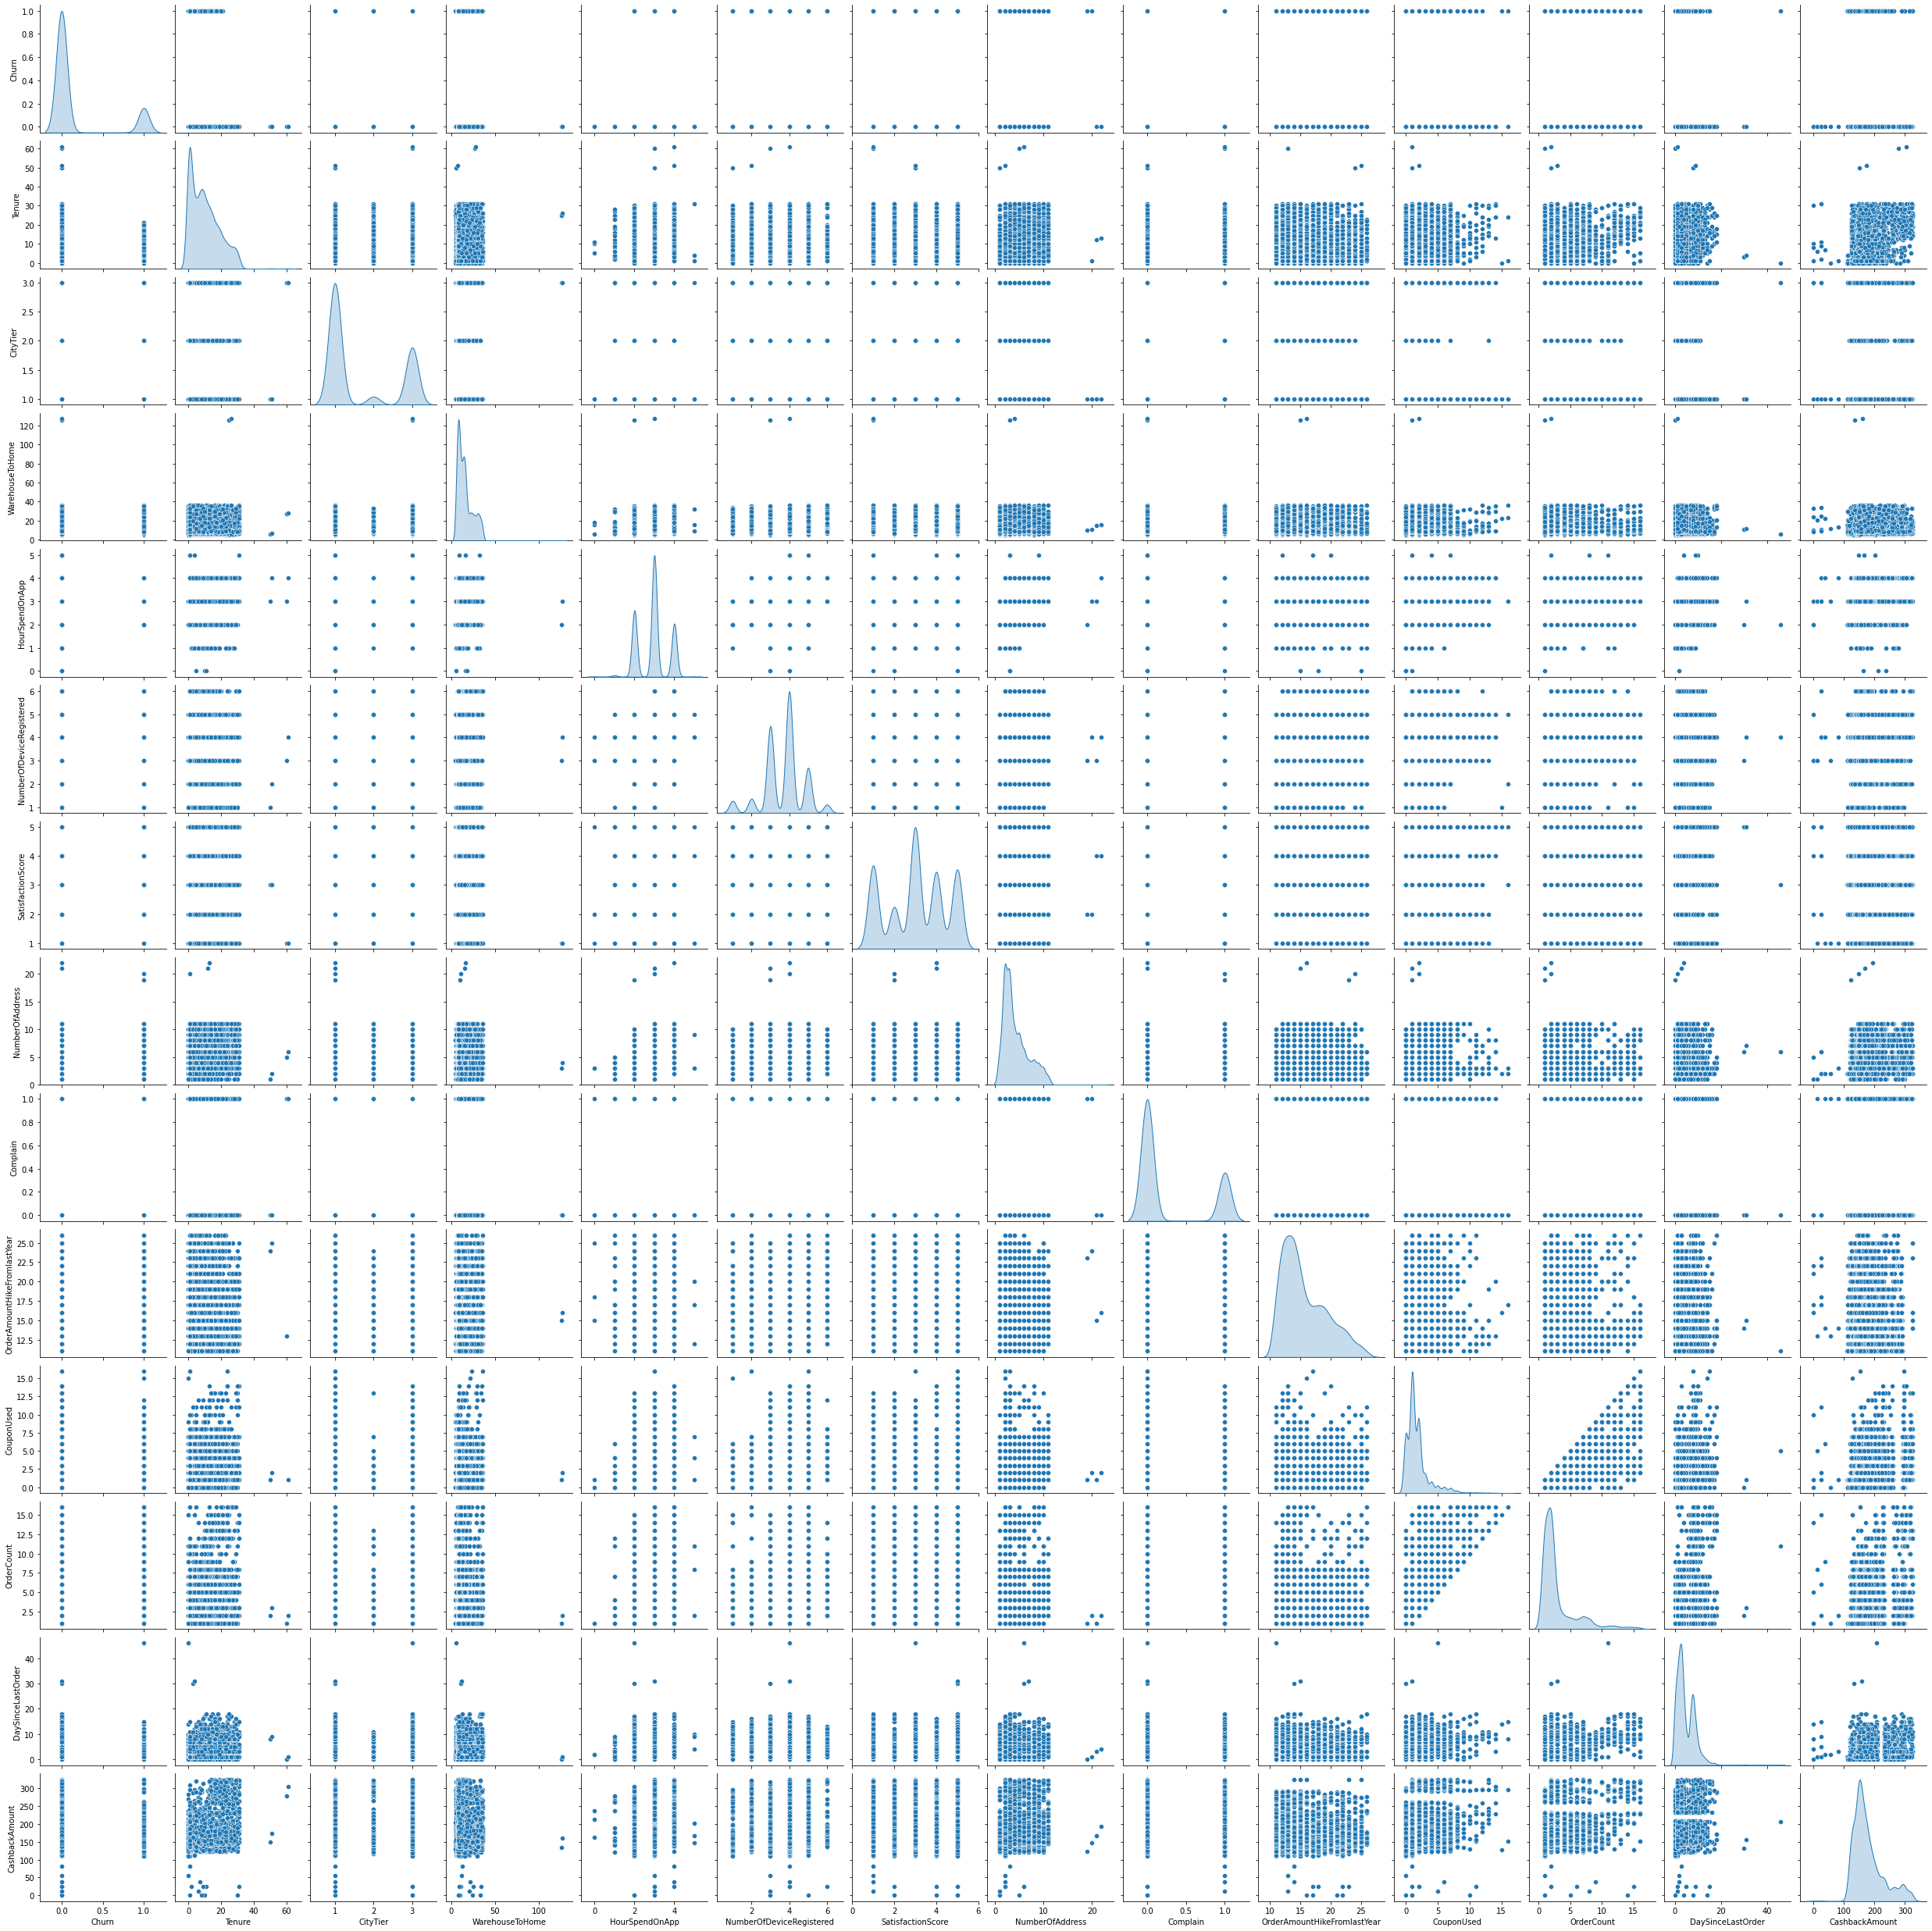

In [ ]:
sns.pairplot(nums_plot, diag_kind='kde', height=2.5);

- Teramati dengan jelas bahwa CoupunUsed memiliki korelasi yang tinggi dengan OrderCount.
- Pairplot di atas semakin memperkuat bahwa memang tidak ada feature yang memang memiliki korelasi kuat terhadap Churn.

### 6.1.3 Pairplot with Hue

Sekarang coba kita manfaatkan Churn sebagai hue untuk melihat apakah ada perbedaan behaviour dari value yang Churn dan tidak Churn pada tiap pasangan feature. Dalam hal ini, kita mengharapkan value 0 dan 1 pada Churn terpisah dengan baik pada suatu pasangan feature.

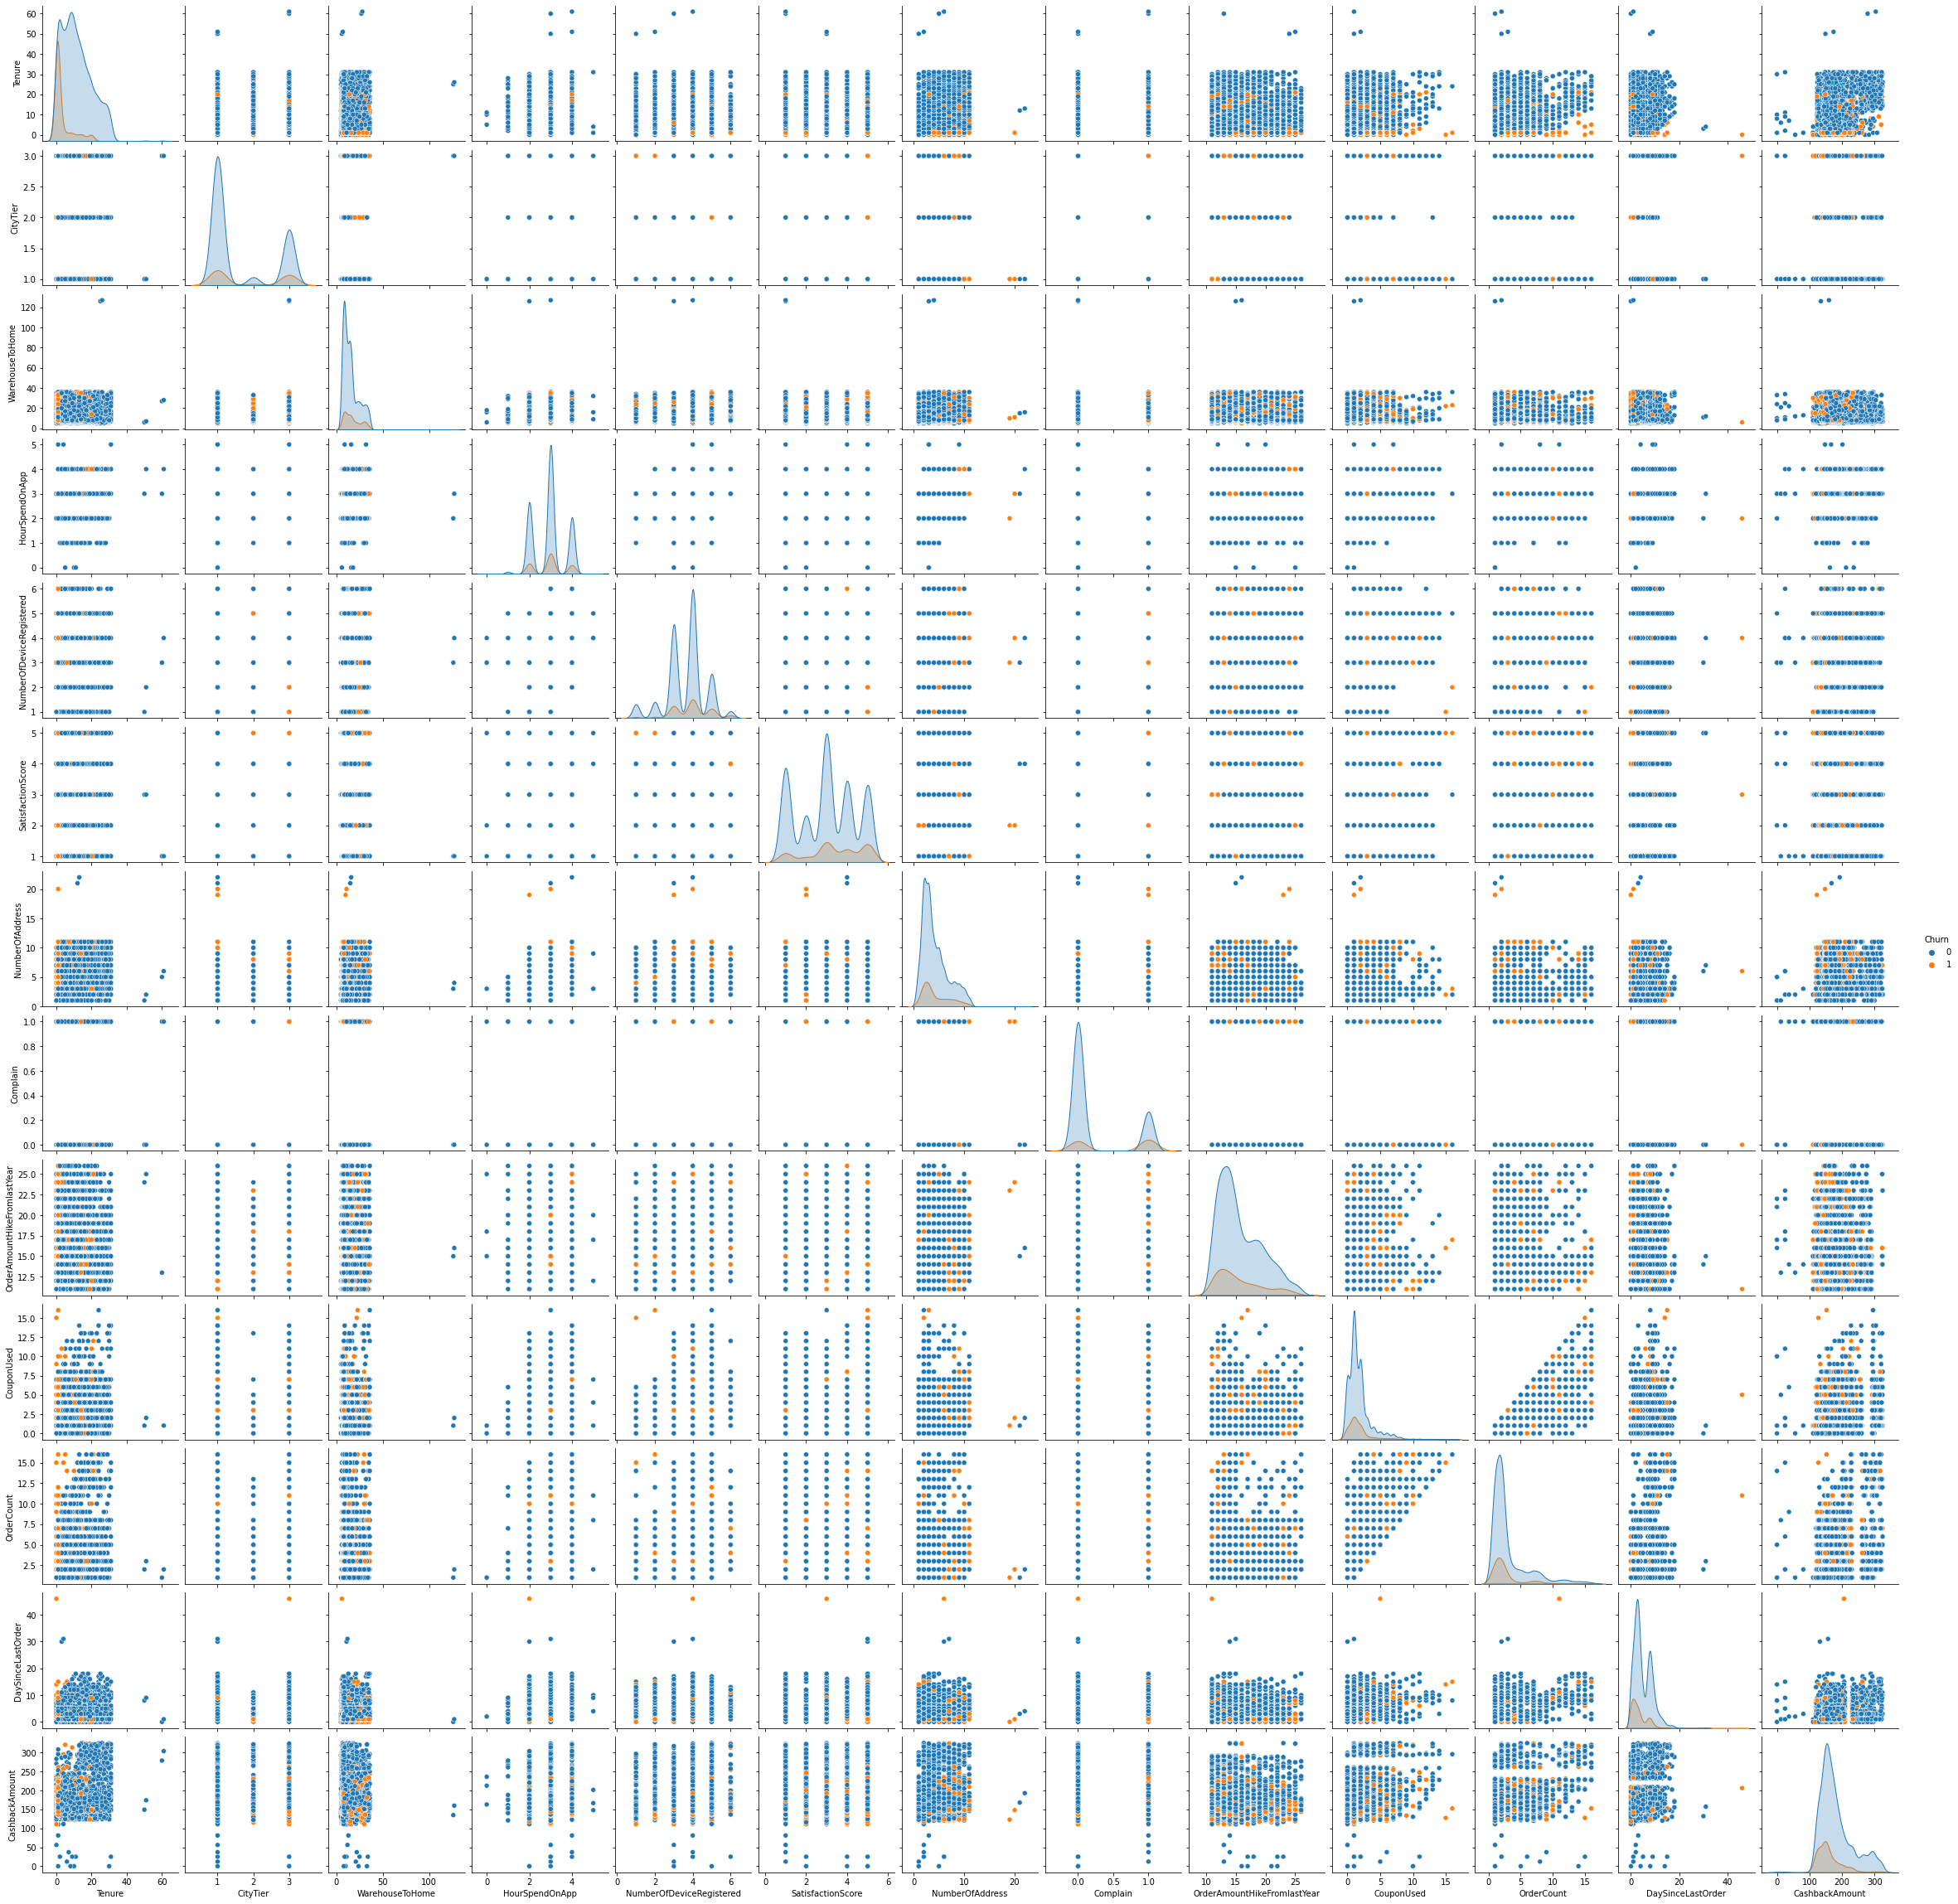

In [ ]:
sns.pairplot(nums_plot, diag_kind='kde', height=2.5, hue='Churn');

Berdasarkan pairplot di atas, kita tidak menemukan adanya pasangan feature yang mampu memisahkan Churn bernilai 0 dan 1 dengan baik. Menariknya, setiap pasangan feature selalu menunjukkan overlapping antara Churn 0 dan 1, di mana Churn bernilai 1 memiliki frekuensi yang selalu lebih tinggi. Tentu saja hal tersebut merupakan efek dari ketimpangan jumlah nilai dari unique value yang perlu kita atasi dengan teknik oversampling atau undersampling pada tahap Data Preparation.

## 6.2 Non-Numerical Features

## 6.2.1 Barplot/Countplot with Hue

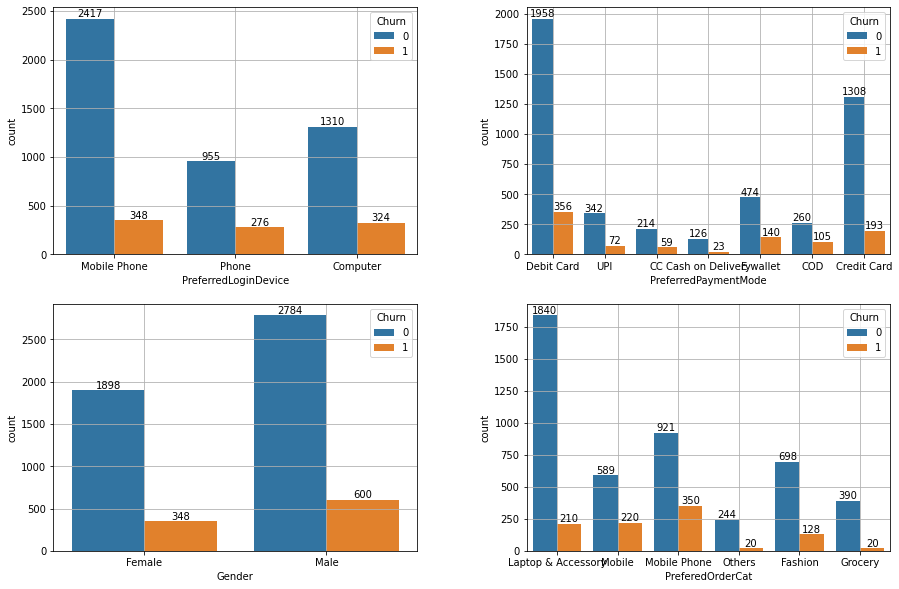

In [ ]:
features = cats.columns

ax = plt.figure(figsize=(15, 10))
for i in range(len(features)):
  if i < len(features)-1:
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=df, x=features[i], hue='Churn')
    plt.subplots_adjust(wspace=0.3)
    plt.grid()
    
    for label in ax.containers:
      ax.bar_label(label)

Dari plot di atas, diketahui bahwa:
- Jumlah customer yang menggunakan mobile phone 2 kali lipat lebih banyak untuk tidak melakukan Churn dibandingkan customer dengan computer.
- Customer dengan debit card dan Credit Card cenderung untuk tidak Churn dibandingkan metode pembayaran lainnya.
- Pembeli Laptop & Accesory juga cenderung tidak Churn dibandingkan value lainnya pada feature PreferedOrderCat.
- Artinya, kolom-kolom di atas dapat kita gunakan sebagai feature kita untuk memprediksi target Churn.